In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
iris = pd.read_csv('iris.csv')
print(iris.head()) 

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [107]:
iris = iris.drop(columns=['Id'])

In [108]:
print("Missing values sum:", iris.isnull().sum())
print("Duplicate rows sum:", iris.duplicated().sum())
iris.dropna(inplace=True)
iris.drop_duplicates(inplace=True)
print("Dropped missing values and duplicates.")

Missing values sum: SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Duplicate rows sum: 3
Dropped missing values and duplicates.


In [109]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


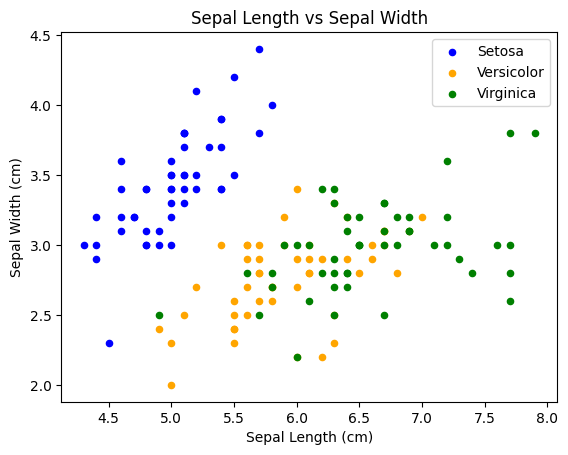

In [110]:
fig = iris[iris['Species'] == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Setosa')
iris[iris['Species'] == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Versicolor', ax=fig)
iris[iris['Species'] == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Virginica', ax=fig)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.show()

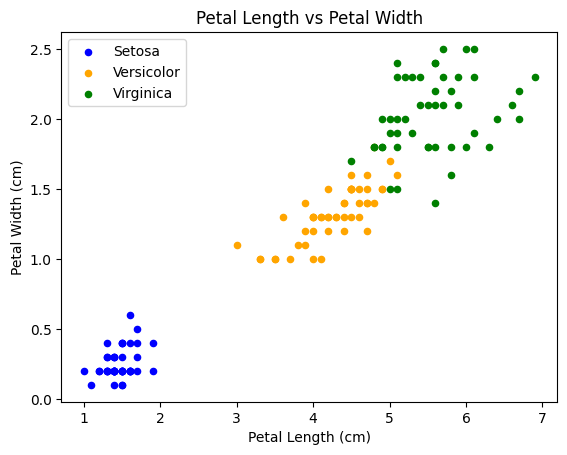

In [111]:
fig = iris[iris['Species'] == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Setosa')
iris[iris['Species'] == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Versicolor', ax=fig)
iris[iris['Species'] == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Virginica', ax=fig)
plt.xlabel('Petal Length (cm)') 
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')
plt.legend()
plt.show()

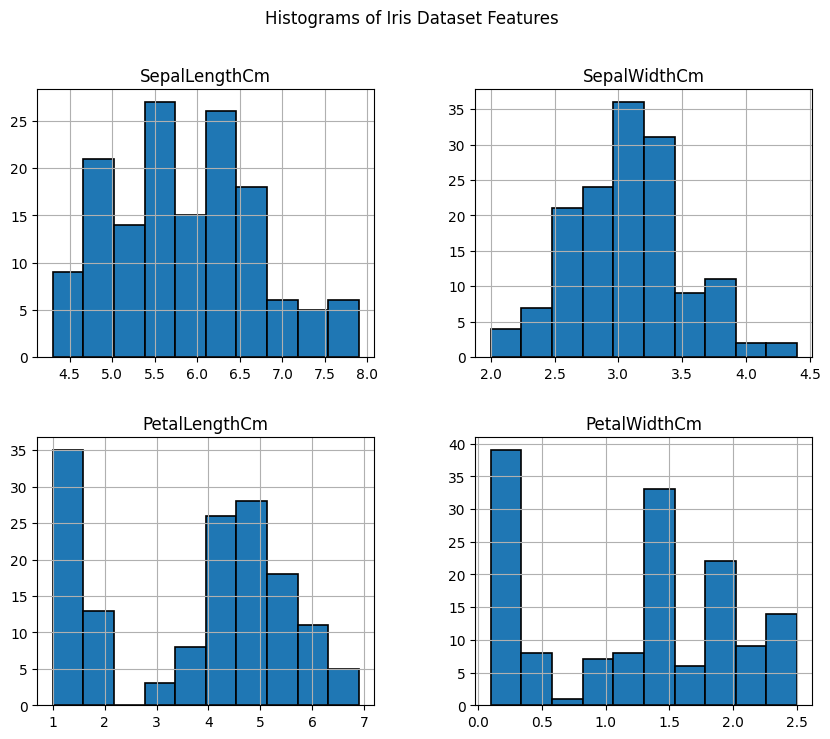

In [112]:
iris.hist(edgecolor='black', linewidth=1.2)
plt.suptitle('Histograms of Iris Dataset Features')
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

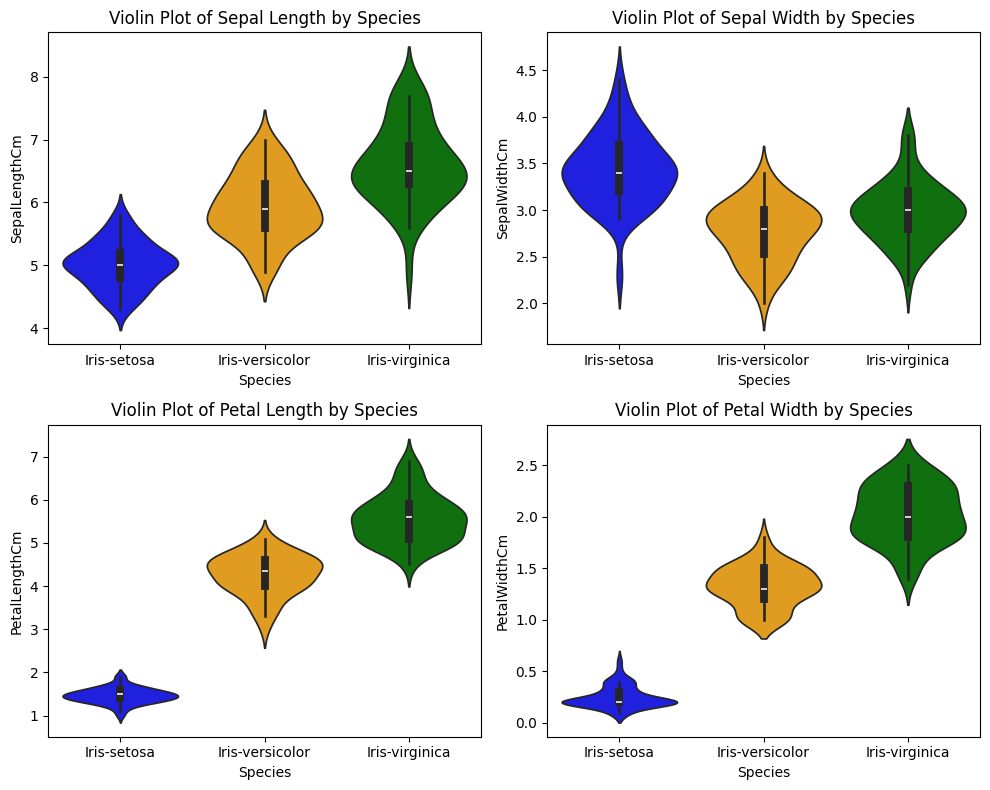

In [113]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
sns.violinplot(data=iris, x='Species', y='SepalLengthCm', palette=['blue', 'orange', 'green'], hue ='Species')
plt.title('Violin Plot of Sepal Length by Species')
plt.subplot(2, 2, 2)
sns.violinplot(data=iris, x='Species', y='SepalWidthCm', palette=['blue', 'orange', 'green'], hue ='Species')
plt.title('Violin Plot of Sepal Width by Species')
plt.subplot(2, 2, 3)
sns.violinplot(data=iris, x='Species', y='PetalLengthCm', palette=['blue', 'orange', 'green'], hue ='Species')
plt.title('Violin Plot of Petal Length by Species')
plt.subplot(2, 2, 4)
sns.violinplot(data=iris, x='Species', y='PetalWidthCm', palette=['blue', 'orange', 'green'], hue ='Species')
plt.title('Violin Plot of Petal Width by Species')
plt.tight_layout()
plt.show()


In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [115]:
iris.shape

(147, 5)

Text(0.5, 1.0, 'Correlation Heatmap of Iris Dataset')

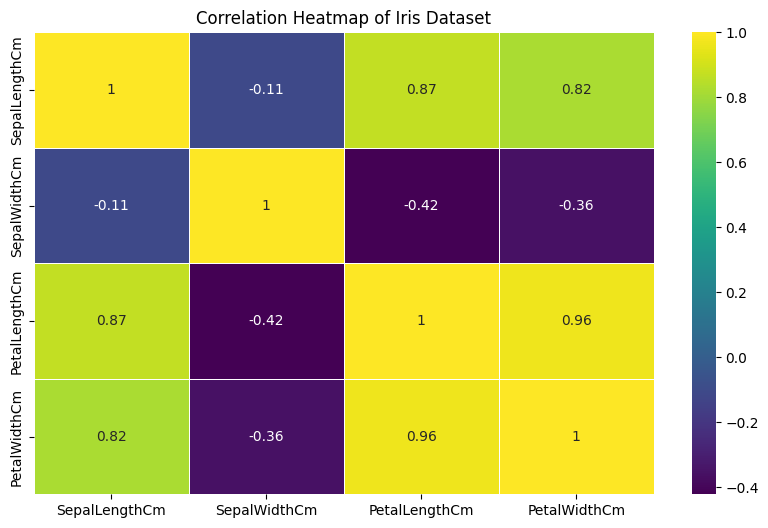

In [116]:
plt.figure(figsize=(10, 6))
sns.heatmap(iris.drop(columns=['Species']).corr(), annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap of Iris Dataset')

In [125]:
train, test = train_test_split(iris, test_size=0.2, random_state=42)
X2_train = train.iloc[:, :2]  # Select first two columns of training data
y_train = train['Species']
X2_test = test.iloc[:, :2]  # Select first two columns of test data
y_test = test['Species']


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X2_train)
X_test_std = scaler.transform(X2_test)

print("Shape of X_train_std:", X_train_std.shape)
print("Shape of X_test_std:", X_test_std.shape) 
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_std: (117, 2)
Shape of X_test_std: (30, 2)
Shape of y_train: (117,)
Shape of y_test: (30,)


In [118]:
print(X_train_std[:5])
print(y_train.head())

[[ 0.59486878  0.05831127  0.94250316  0.76726863]
 [-1.60687754  0.28572521 -1.38920785 -1.36694663]
 [-0.38368514 -0.62393057  0.60127716  1.03404553]
 [-0.8729621   0.96796705 -1.33233685 -1.36694663]
 [-1.11760058  1.195381   -1.38920785 -1.36694663]]
137    Iris-virginica
47        Iris-setosa
121    Iris-virginica
27        Iris-setosa
4         Iris-setosa
Name: Species, dtype: object


In [119]:
print(X_test_std[:5])
print(y_test.head())

[[ 0.22791106 -0.16910268  0.60127716  0.76726863]
 [-0.50600438 -1.7610003   0.08943815  0.10032636]
 [ 0.96182651  0.05831127  0.99937416  1.56759935]
 [-0.99528134  1.65020889 -1.33233685 -1.23355818]
 [-1.23991982 -1.30617241  0.37379316  0.63388017]]
127     Iris-virginica
53     Iris-versicolor
140     Iris-virginica
19         Iris-setosa
106     Iris-virginica
Name: Species, dtype: object


SVM

In [122]:
model = svm.SVC(kernel='linear')
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]


In [123]:
import warnings

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = plt.cm.RdYlBu

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl,
                    edgecolor='black')

In [124]:
plot_decision_regions(X_test_std, y_test, svm)



AttributeError: module 'sklearn.svm' has no attribute 'predict'